In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Overview
1. Import data
* data is unstructured add heading
* add new column to separate movie ids from customer ids
2. Data cleaning
* choose top 30% most rated movies
* choose top 30% most rating users
* drop rest 70% customers and movie ids
* build pivot table to understand which customer has rated which movie and ho
3. SVD model

In [16]:
df = pd.read_csv('combined_data_1.txt' )
df

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03
...,...,...
2591364,2.0,2005-02-16
1791000,2.0,2005-02-10
512536,5.0,2005-07-27
988963,3.0,2005-12-20


In [ ]:
# Here, 1 is Movie ID,1488844 is Customer ID,And 3.0 is Rating given
# But in the above data set,movie id has been taken as column while loading,so we will fix it

In [5]:
# Header = none will not consider 1 as column name/header,also not including date column as its not relevant
# Also naming cust_id and rating to 0 and 1 columns as they were not named earlier
dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [10]:
dataset['Rating'] = dataset['Rating'].astype(float)

In [13]:
dataset.head(2)
# Now we can see,as 1 is now considered as cust_id,rest rating is coming NAN,but 1 should be considered as Movie ID
# Also because of 1: entire col has been taken as Object Type

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0


In [11]:
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [14]:
#To inspect the shape of the datset
dataset.shape

(24058263, 2)

In [15]:
# Grouping ratings wrt their count
p = dataset.groupby('Rating')['Rating'].agg(['count'])
p

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [19]:
# Total number of movies
# As each movie id is having nan
movie_count = dataset.isnull().sum()[1]
movie_count

4499

In [20]:
# Total customers
cust_count = dataset['Cust_Id'].nunique()-movie_count

cust_count

470758

In [21]:
# Total Ratings
rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

24053764

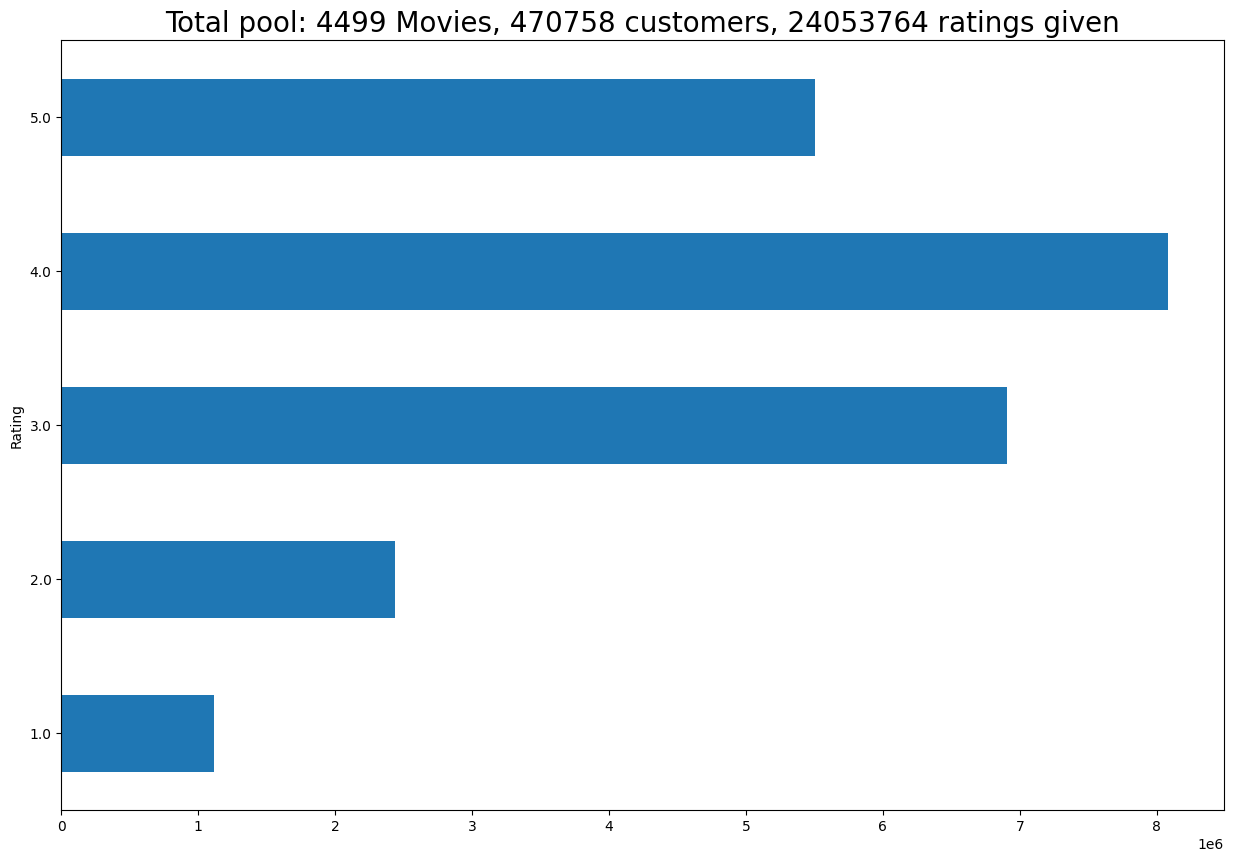

In [22]:
# Ratings distribution via BarPlot

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.show()

In [23]:
# Now creating a separate column for Movie Id
# Using Boolean logic to extract True for Nan Values
df_nan = pd.DataFrame(pd.isnull(dataset.Rating))

df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [24]:
# Extracting only True Data
df_nan = df_nan[df_nan['Rating'] == True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [25]:
df_nan.shape

(4499, 1)

In [26]:
# Here we have got new column as index with new index
df_nan = df_nan.reset_index()

df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [27]:
df_nan['index'][1:] #Fetching data from 1st row of index to last row

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [28]:
df_nan['index'][:-1] #Fetching data from 0th row ,till second last row

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [30]:
df_nan.iloc[-1, 0]

24057834

In [31]:
len(dataset)

24058263

In [ ]:
# To get movie id's from where to where
# Movie id 2- Movie id 1 - 1 = count of rowsto put movie id 1
# As per above logic:
# df_nan['index'][:-1] - df_nan['index'][1:] - 1
# 548 - 0 - 1 = 547//fill 1 till 547

In [29]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):  #above logic
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)  #fill movie id from 1st index,till (i-j-1) logic,in col movie id
    movie_np = np.append(movie_np, temp) #appending into empty list
    movie_id += 1 #incrementing movie id

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [37]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int) #as we got float in above result
print('-Dataset examples-')
dataset.tail()

-Dataset examples-


,Cust_Id,Rating,Movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [38]:
dataset.shape

(24053764, 3)

# Data Cleaning

In [ ]:
# We can not remove nulls,or duplicates/neither outliers in this data

In [ ]:
# Finding the movies which are rated least by people,as netflix will never suggest that

In [42]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
f = ['count','mean']

dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)  #total count of rating movie id got

dataset_movie_summary.index = dataset_movie_summary.index.map(int) #converting/mapping to integer

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0) #70% percentile

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index #if the count is less than movie benchmark,drop them
#if movie is not reviewed more than 1799 times,it will go to drop_movie_list 
print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1799.0


In [43]:
#If the person is only watching and not judging the movies,his rating is not important

#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 52.0


In [44]:
print(f'Original Shape: {dataset.shape}')

Original Shape: (24053764, 3)


In [45]:
# Final Data with top 70%

dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (17337458, 3)


In [46]:
print('-Data Examples-')
dataset.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [47]:
# Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId
# Pivot Table creation

df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(143458, 1350)


In [49]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Loading the movie_titles dataset

In [62]:
df_title = pd.read_csv('movie_titles.csv',encoding="Latin-1",header=None,names=['Movie_Id', 'Year', 'Name'],on_bad_lines='skip') # Skip lines with too many or too few fields


In [63]:
df_title.set_index('Movie_Id', inplace = True)
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


# To install the scikit-surprise library for implementing SVD

In [68]:
# !pip install surprise
# This code didnt worked so using the alternate code below

# SVD can be used for recommendation system,dimensionality reduction,image clarity

In [67]:
conda install -c conda-forge scikit-surprise

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Asus\anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.4   |       h56e8100_0         151 KB  conda-forge
    certifi-2024.7.4           |     pyhd8ed1ab_0         156 KB  conda-forge
    openssl-3.3.1              |       h2466b09_2         8.0 MB  conda-forge
    python_abi-3.11            |          2_cp311           5 KB  conda-forge
    scikit-surprise-1.1.4      |  py311h814a670_1         543 KB  conda-forge
    ucrt-10.0.22621.0          |       h57928b3_0         1.2 MB  conda-forge
    vc14_runtime-14.40.33810   |      ha82c5b3_20         734 KB  conda-forge
    vs2015_runtime-14.40.33810 |      h3bf8584_20          17 KB  conda-forge
    ------------------------------------------------------------
        



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1




In [69]:
# Import required libraries
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [70]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader) #taking first 100k rows for faster process

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
# Simple Error/Mean Error -- avg(Y - Ypred)
# RMSE(Root mean square error) --> Root of mean squared error
# MAE(Mean Absolute Error) - when avg of simple error is 0,then we use MAE where we take absolute of errors to cancel out tjhe - ve sign impact
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True) #cv = 3 means 3 iterations,verbose will update the data

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9996  0.9981  0.9976  0.9984  0.0009  
MAE (testset)     0.8098  0.8061  0.8105  0.8088  0.0019  
Fit time          1.14    1.24    1.23    1.21    0.04    
Test time         0.37    0.21    0.22    0.27    0.07    


{'test_rmse': array([0.99959901, 0.99805094, 0.99756221]),
 'test_mae': array([0.80981795, 0.80609912, 0.81052762]),
 'fit_time': (1.1437678337097168, 1.2427396774291992, 1.2334914207458496),
 'test_time': (0.3707849979400635, 0.21279191970825195, 0.21904993057250977)}

In [71]:
dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [72]:
# To find all the movies rated as 5 stars by user with userId = 712664(random user)
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id') #setting movie id as index
dataset_712664 = dataset_712664.join(df_title)['Name'] #joining main table to movie title 
dataset_712664.head(10)

Movie_Id
3                              Character
79                           The Killing
175                       Reservoir Dogs
199                      The Deer Hunter
241                   North by Northwest
256    Ghost Dog: The Way of the Samurai
348        The Last Temptation of Christ
357                House of Sand and Fog
416                             Elephant
442                  Mississippi Burning
Name: Name, dtype: object

In [74]:
# Train an SVD to predict ratings for user with userId = 1
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [73]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often
# considering those movie which are not in drop movie list
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
# reading the dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
# we can not use train test split here
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
# Getting the estimation score as new column
# Estimation score is used for recommendation
# To understand lambda code,read from right to left
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est) #apply will apply the lambda fn for whole dataset

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10)) #top 10 movies user will like
# print(user_712664.tail(10)) #this will give movies user will never like

        Year                                     Name  Estimate_Score
857   1954.0                            Seven Samurai        5.000000
711   2003.0                       The Wire: Season 1        5.000000
67    2004.0                              Invader Zim        5.000000
173   1992.0                           Reservoir Dogs        5.000000
4270  2002.0           Curb Your Enthusiasm: Season 3        5.000000
666   2001.0                     In the Mood for Love        4.961500
1567  1949.0                            The Third Man        4.950244
554   1963.0                             High and Low        4.945263
163   1982.0  Richard Pryor: Live on the Sunset Strip        4.945139
32    2000.0           Aqua Teen Hunger Force: Vol. 1        4.929258
